# ***CNN for image recognition using the CIFAR-10 dataset with TensorFlow/Keras.***

## Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test /255.0

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 6s 0us/step


## Step 3: Build the Convolutional Neural Network (CNN) Model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(63, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Step 4: Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Step 5: Train the Model

In [5]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 88s 55ms/step - loss: 1.5610 - accuracy: 0.4309 - val_loss: 1.3035 - val_accuracy: 0.5266
Epoch 2/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.2129 - accuracy: 0.5693 - val_loss: 1.1984 - val_accuracy: 0.5736
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0662 - accuracy: 0.6250 - val_loss: 1.0324 - val_accuracy: 0.6374
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9745 - accuracy: 0.6596 - val_loss: 0.9736 - val_accuracy: 0.6568
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9027 - accuracy: 0.6837 - val_loss: 1.0059 - val_accuracy: 0.6429
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8433 - accuracy: 0.7035 - val_loss: 0.9644 - val_accuracy: 0.6641
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7948 - accuracy: 0.7210 - val_loss: 0.9112 -

## Step 6: Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.8841 - accuracy: 0.7013
Test accuracy: 0.7013000249862671


## Step 7: Visualize Training History

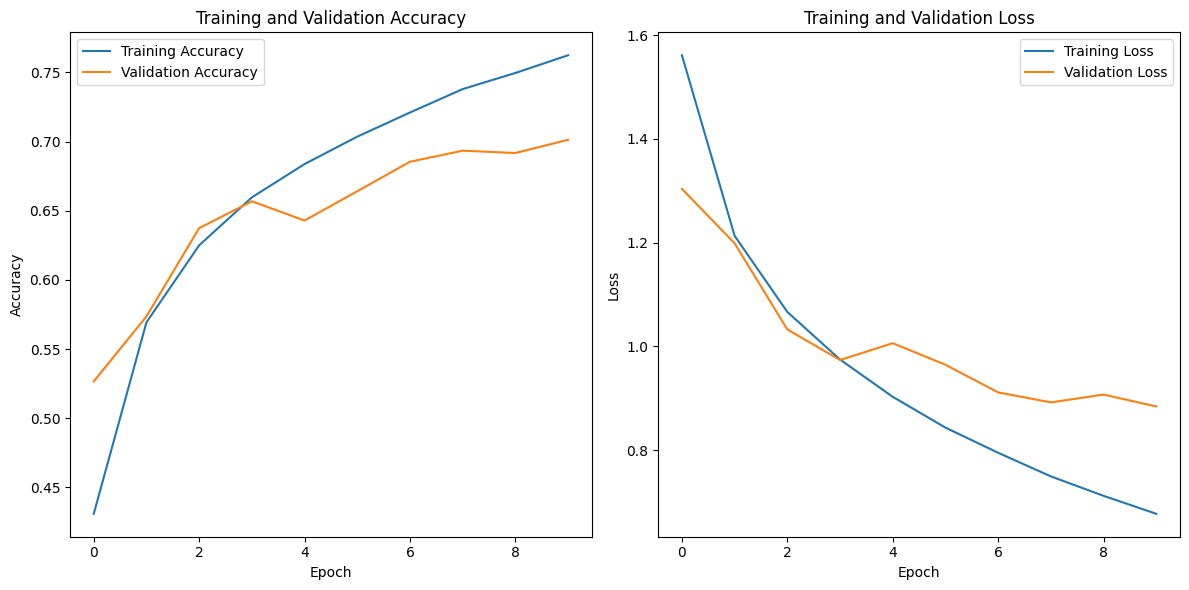

In [7]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Additional Step: Visualize Some Predictions

313/313 [==============================] - 9s 27ms/step


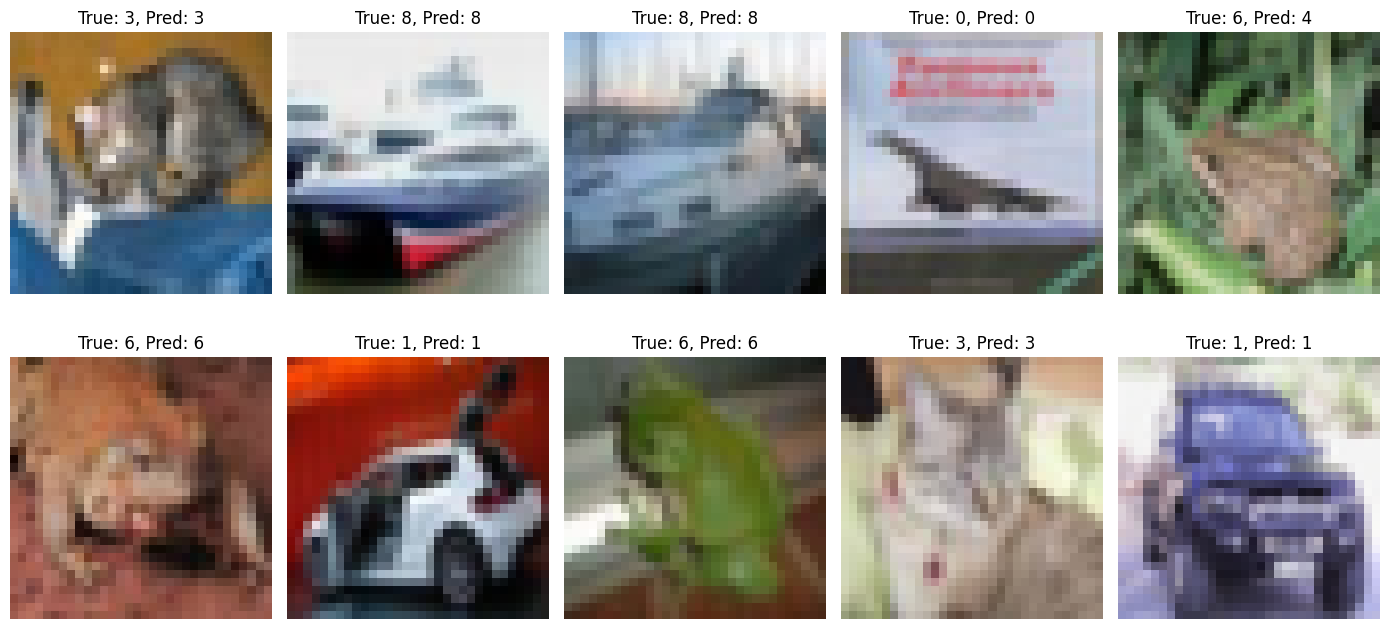

In [8]:
# Make predictions
predictions = model.predict(x_test)

# Convert predictions from one-hot encoding
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(y_test, axis=1)

# Plot some test images with their predicted and true labels
plt.figure(figsize=(14, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
